In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
df = pd.read_csv('DailyDelhiClimateTest.csv')

In [95]:
df.shape

(114, 5)

In [96]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [97]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [99]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

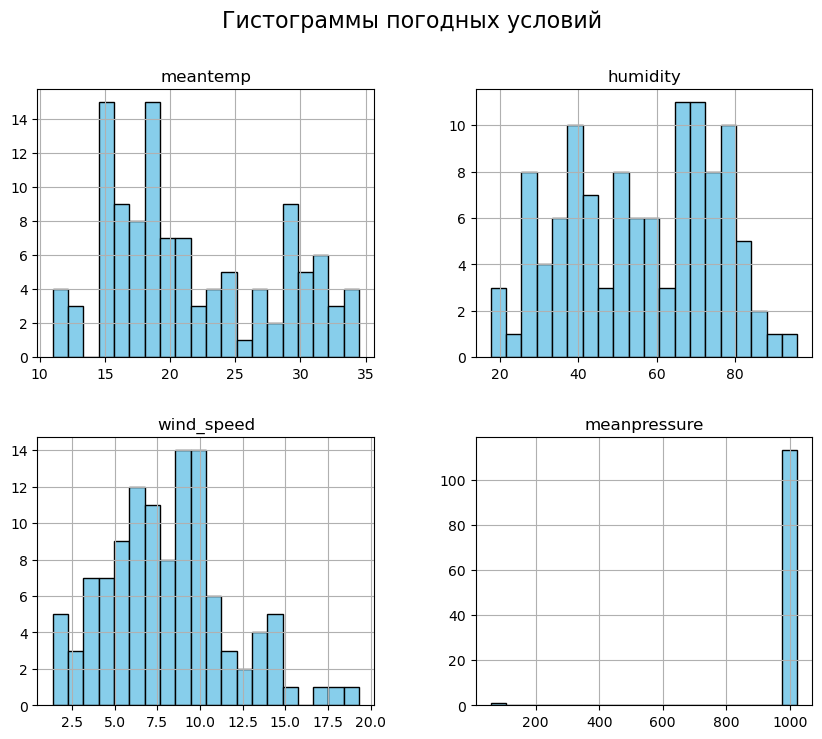

In [100]:
#гистограммы
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы погодных условий', fontsize=16)
plt.show()

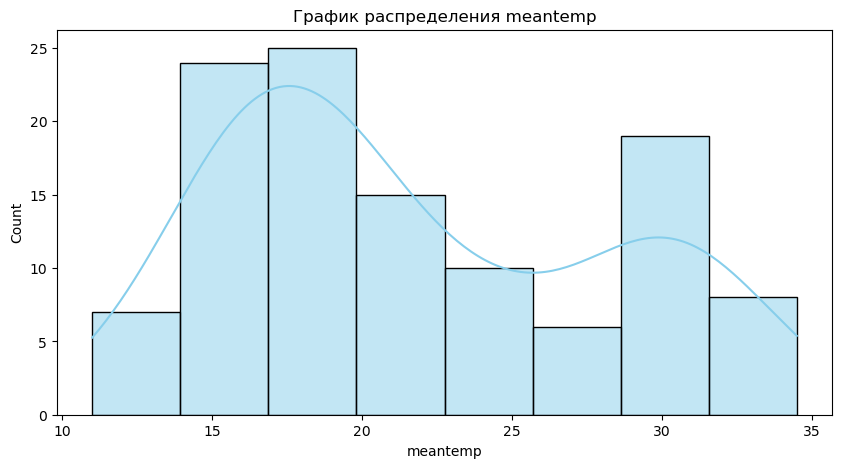

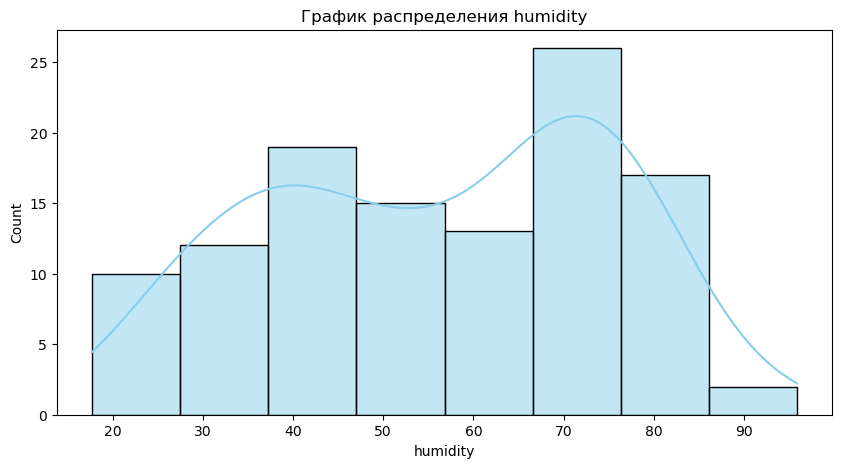

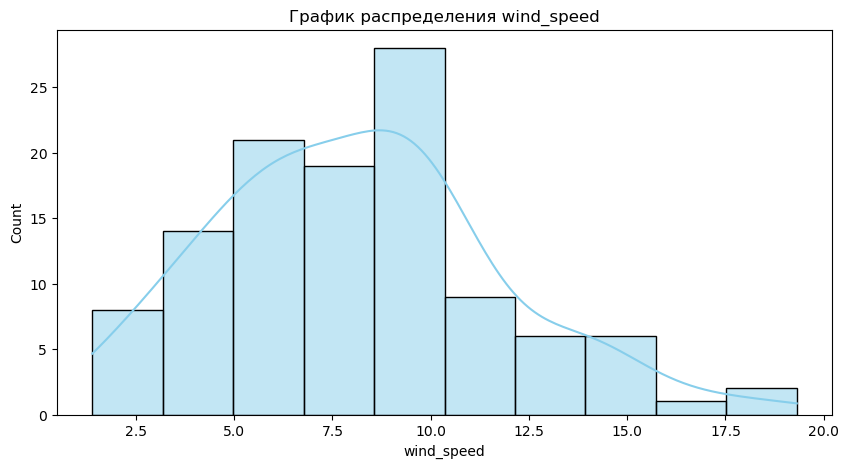

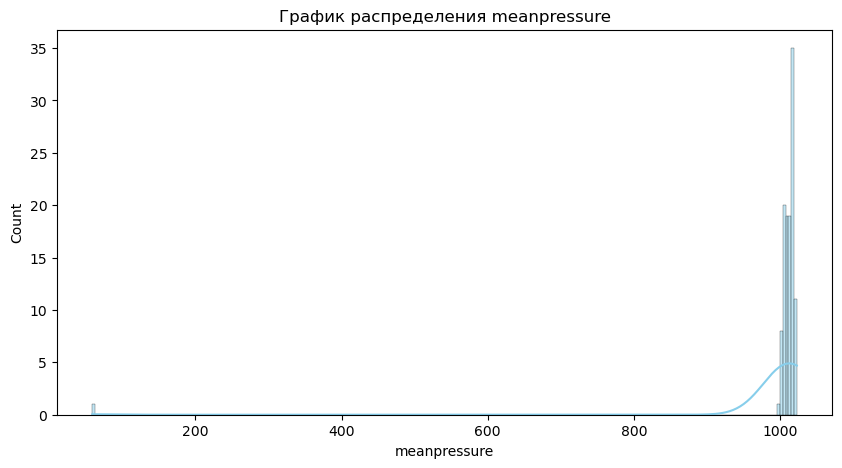

In [101]:
columns = ['meantemp','humidity','wind_speed','meanpressure']
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title('График распределения ' + str(column))
    plt.show()

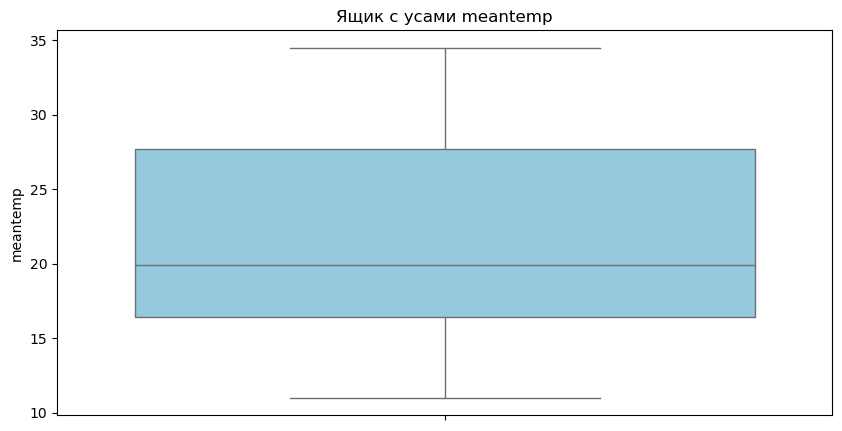

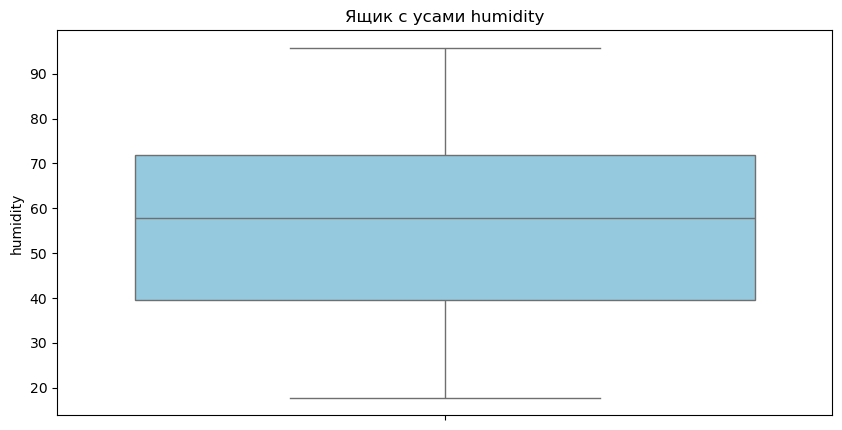

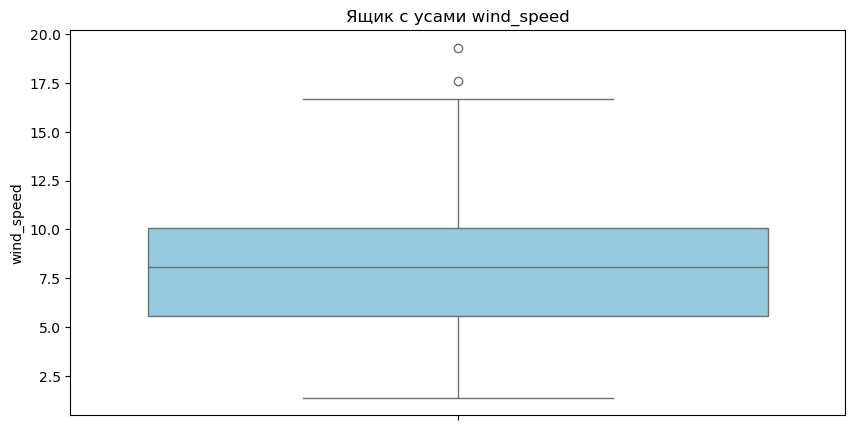

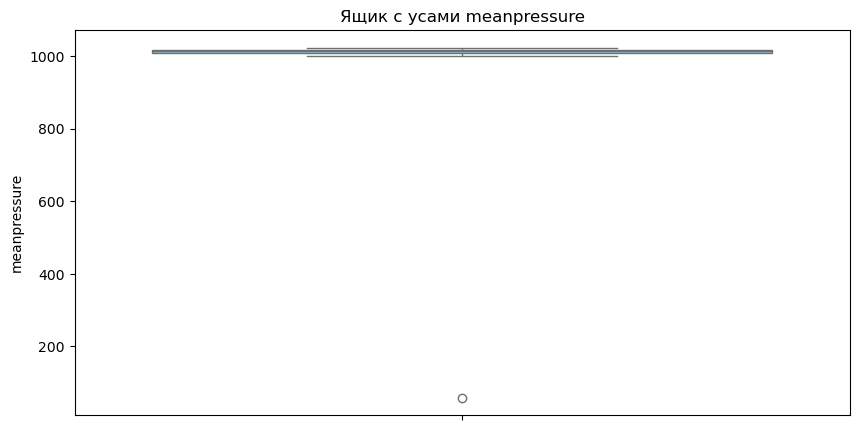

In [102]:
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column], color='skyblue')
    plt.title('Ящик с усами ' + str(column))
    plt.show()

In [103]:
#Влажность от 40 до 70, Температура от 16 до 27, Давление около 1000 мм/рт., Скорость ветра от 5 до 10 метров в секунду

In [104]:
from sklearn.cluster import KMeans

In [105]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
#print(df['cluster'])

0      1
1      2
2      2
3      2
4      2
      ..
109    0
110    0
111    0
112    0
113    0
Name: cluster, Length: 114, dtype: int32


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


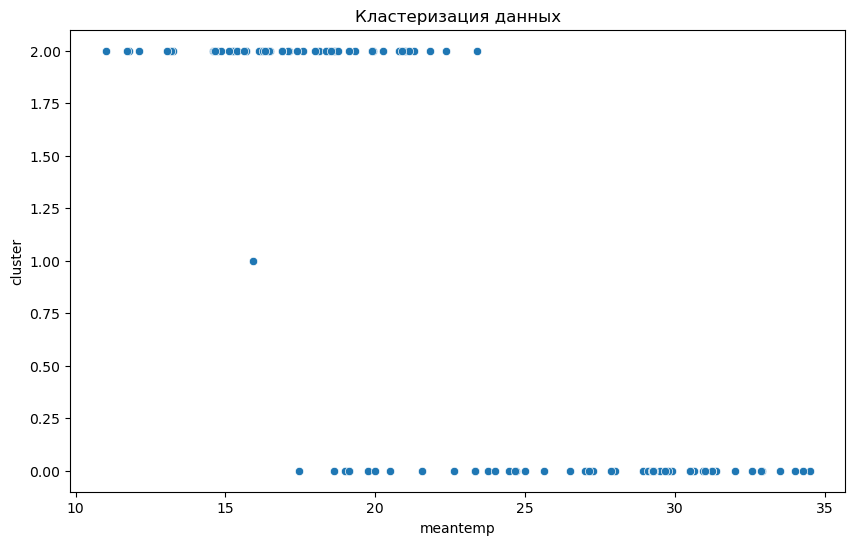

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meantemp', y='cluster', data=df)
plt.title('Кластеризация данных')
plt.show()

In [118]:
X = df[['humidity', 'wind_speed', 'meanpressure']]  #прогноз по всем признакам, кроме 'meantemp' и 'date'
y = df['meantemp']  #Прогнозируемый признак - температура
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train)

33     15.636364
62     19.125000
65     22.625000
28     15.666667
42     16.250000
         ...    
106    32.555556
14     16.434783
92     30.500000
51     21.833333
102    29.666667
Name: meantemp, Length: 79, dtype: float64


In [120]:
import xgboost as xgb

In [121]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

In [126]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
print(r2_train)

0.9999999427815262


In [127]:
r2_test = r2_score(y_test, y_test_pred)
print(r2_test)

0.8226426575542513


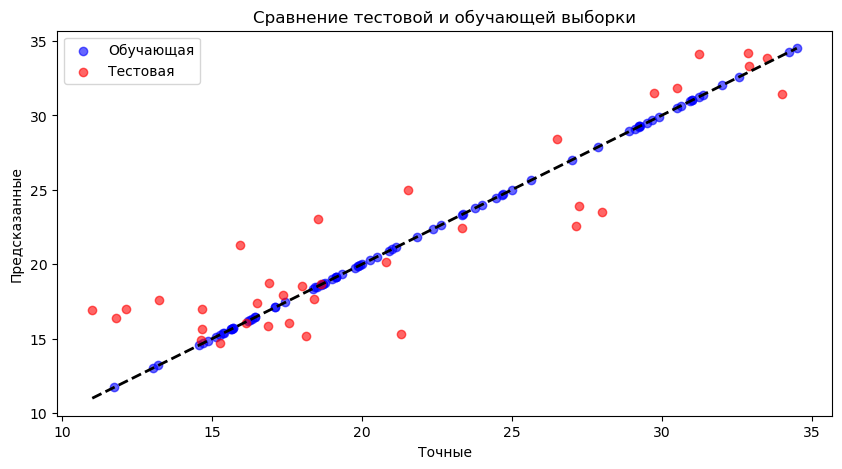

In [129]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, label='Обучающая', color='blue', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Тестовая', color='red', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel('Точные')
plt.ylabel('Предсказанные')
plt.title('Сравнение тестовой и обучающей выборки')
plt.legend()
plt.show()